# CONSIGNA 1:

**_1) Cargamos los datos_**
- Carguen el dataset:
```
  data = pd.read_csv("encuesta-anual-hogares-2019.csv", sep=',') 
```
**_2) Inspección inicial_**
- Eliminen las columnas `id` y `hijos_nacidos_vivos`

**_3) Discretización_**
- Para las siguientes columnas discreticen por igual frecuencia e igual rango.
    <br>`ingresos_familiares` con q=8
    <br>`ingreso_per_capita_familiar` con q=10

- En algunas situaciones hay ciertos elementos que se repiten al momento de discretizar, una forma de eliminar duplicados es con el argumento `duplicates='drop'`.
    <br><br>Para las siguientes columnas `ingreso_total_lab` y `ingreso_total_no_lab` consideren:
    ```
    data['ingreso_total_lab'] = pd.qcut(data['ingreso_total_lab'], q=10, duplicates='drop')
    data['ingreso_total_no_lab'] = pd.qcut(data['ingreso_total_no_lab'], q=4, duplicates='drop')
    ```

- Para la columna `edad` discreticen usando igual distancia con `bins=5`.

**_4) Preparación de datos_**
- Cambien el tipo de dato a `str` de las siguientes columnas: `comuna` y `nhogar`.
  <br>_¿Por qué hacemos esto?_ Para estas columnas el número es simplemente una connotación, para representar una comuna por ejemplo pero no hay una relación numérica entre ellos.

- _¿Qué esperas como valor en la columna `años_escolaridad`?_ Número enteros pero no siempre es así, cada entidad o empresa tiene diferentes formas de rellenar una encuesta.
    <br>Evalua lo siguiente: `data['años_escolaridad'].unique()`, vas a poder ver los valores únicos en la columna. Donde destacamos que todos son `object/string`.

- Reemplazar `Ningun año de escolaridad aprobado` por un '0'. 
<br>Efectivamente por '0' y no 0, porque esta columna maneja datos tipo `object/string`.
    ```
    data['años_escolaridad'] = data['años_escolaridad'].replace('Ningun año de escolaridad aprobado', '0')
    ```

- Vamos a convertir los tipos de datos de la columna anterior `años_escolaridad` a enteros.
    <br>De manera intuitiva podríamos hacer:
    ```
    data['años_escolaridad'] = data['años_escolaridad'].astype(float).astype("Int32")
    ```
    PEROOOOOOO marca un error, ¿cierto?
    
    Posiblemente muchas veces les pase que cuando hagan una _cast_ (conversión de un tipo de dato a otro) pueden llegar a tener conflictos si esa columna tienen _NaN_. Para este caso si queremos convertir los valores de la columna `años_escolaridad` de _string_ a _int_, hay que hacer un paso intermedio que es pasarlo a _float_.
    ```
    data['años_escolaridad'] = data['años_escolaridad'].astype(float).astype("Int32")
    ```

- Discreticen para la columna `años_escolaridad` por igual frecuencia e igual rango con un `q=5`

- No necesariamente siempre hay que rellenar los `NaN` en todas las columnas, porque quizás esa cantidad de `NaN` no es tan representativa para nuestro análisis. Así que podes eliminarlo para todo el dataframe o para ciertas columnas.
    ```
    # Eliminar filas que contengan NaN
    data = data.dropna(subset=['situacion_conyugal', 'sector_educativo', 'lugar_nacimiento', 'afiliacion_salud'])
    ```
- Después de eliminar filas, podes resetear el índice para que mantenga la secuencia:
    ```
    data = data.reset_index(drop=True)
    ```

- Rellenar los datos faltantes para la columna `años_escolaridad`. Primero añadan la categoría `desconocido` y luego hacen un rellenado de los datos faltantes con `desconocido`.

- Rellenar los datos faltantes para la columna `nivel_max_educativo` con `value=desconocido`

In [495]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status, profiling_num

pd.set_option('display.max_columns', None)

data = pd.read_csv("./data/encuesta-anual-hogares-2019.csv", sep=",", encoding='ISO-8859-1') 
data_original = data.copy()

data.drop(['id', 'hijos_nacidos_vivos'], axis=1, inplace=True)

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,nhogar,0,0.000000,0,0.000000,7,int64
1,miembro,0,0.000000,0,0.000000,19,int64
2,comuna,0,0.000000,0,0.000000,15,int64
3,dominio,0,0.000000,0,0.000000,2,object
4,edad,0,0.000000,128,0.008939,101,int64
5,sexo,0,0.000000,0,0.000000,2,object
6,parentesco_jefe,0,0.000000,0,0.000000,9,object
7,situacion_conyugal,1,0.000070,0,0.000000,7,object
8,num_miembro_padre,0,0.000000,0,0.000000,9,object
9,num_miembro_madre,0,0.000000,0,0.000000,11,object


In [496]:
data['ingresos_familiares'], seved_bins_ingresos_familiares = pd.qcut(data['ingresos_familiares'], q=8, retbins=True)
data['ingreso_per_capita_familiar'], seved_bins_ingresos_familiares = pd.qcut(data['ingreso_per_capita_familiar'], q=8, retbins=True)
data['edad'], saved_bins_age = pd.cut(data['edad'], bins=5, retbins=True )


array([[<Axes: title={'center': 'nhogar'}>,
        <Axes: title={'center': 'miembro'}>],
       [<Axes: title={'center': 'comuna'}>,
        <Axes: title={'center': 'ingreso_total_lab'}>],
       [<Axes: title={'center': 'ingreso_total_no_lab'}>,
        <Axes: title={'center': 'ingresos_totales'}>]], dtype=object)

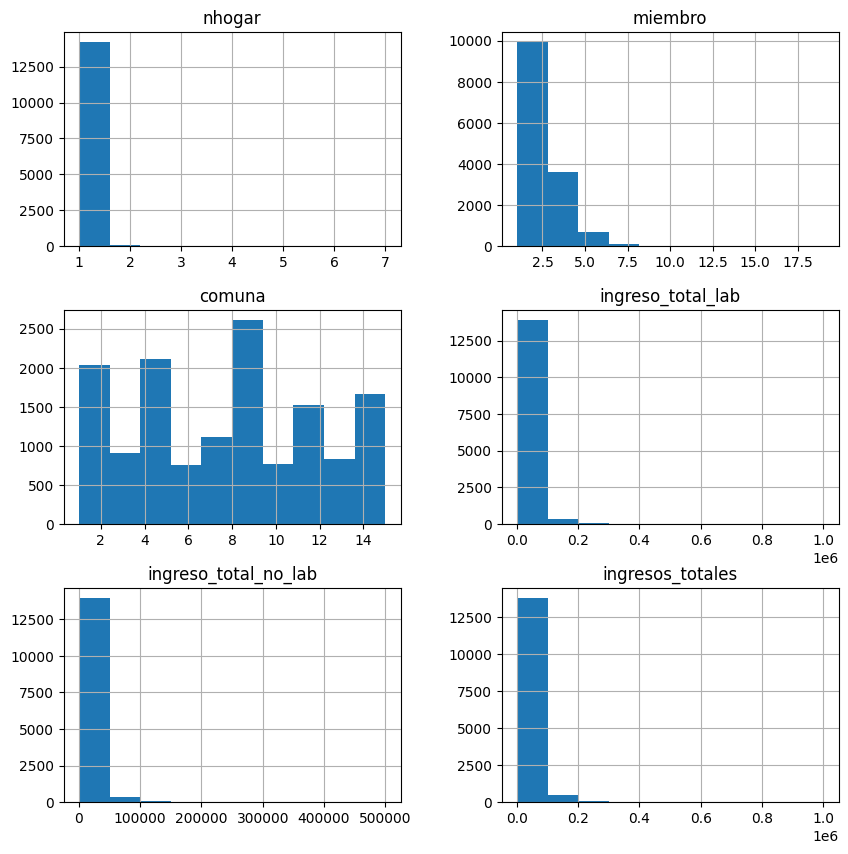

In [497]:
data.hist(figsize=(10,10))

In [498]:
profiling_num(data)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,comuna,7.620644,4.236359,0.555906,1.0,1.0,4.0,8.0,11.0,15.0,15.00
1,ingreso_total_lab,20078.626440,34698.173111,1.728115,0.0,0.0,0.0,2500.0,30000.0,80000.0,140000.00
2,ingreso_total_no_lab,6016.234583,16065.350052,2.670333,0.0,0.0,0.0,0.0,4000.0,32000.0,73916.66
3,ingresos_totales,26094.861024,37152.503186,1.423748,0.0,0.0,0.0,16000.0,37000.0,85505.0,150820.00
4,miembro,2.144982,1.354969,0.631693,1.0,1.0,1.0,2.0,3.0,5.0,6.00
5,nhogar,1.009638,0.126376,0.125169,1.0,1.0,1.0,1.0,1.0,1.0,1.00


In [499]:
data['ingreso_total_lab'] = pd.qcut(data['ingreso_total_lab'], q=10, duplicates='drop')
data['ingreso_total_no_lab'] = pd.qcut(data['ingreso_total_no_lab'], q=4, duplicates='drop')

freq_tbl(data['ingreso_total_no_lab'])



,ingreso_total_no_lab,frequency,percentage,cumulative_perc
0,"(-0.001, 4000.0]",10741,0.750122,0.750122
1,"(4000.0, 500000.0]",3578,0.249878,1.000000


In [500]:
data['comuna'] = data['comuna'].astype(str)
data['nhogar'] = data['nhogar'].astype(str)


In [501]:
data.replace("Ningun año de escolaridad aprobado", "0", inplace=True)
data['años_escolaridad'] = data['años_escolaridad'].astype(float).astype('Int16')
data['años_escolaridad'].fillna(0, inplace=True)
data['años_escolaridad'], saved_bins_anos_escolaridad = pd.qcut(data['años_escolaridad'], q=5, retbins=True)

/var/folders/fh/_f8pfpwx3mv0tm7n6vzq25b00000gn/T/ipykernel_88384/1686151666.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['años_escolaridad'].fillna(0, inplace=True)


In [502]:
data = data.dropna(subset=['situacion_conyugal', 'sector_educativo', 'lugar_nacimiento', 'afiliacion_salud'])
data.reset_index(drop=True, inplace=True)

In [503]:
data['nivel_max_educativo'] = data['nivel_max_educativo'].astype('category')
data['nivel_max_educativo'] = data['nivel_max_educativo'].cat.add_categories('desconocido')
data['nivel_max_educativo'].fillna('desconocido', inplace=True)

status(data)

/var/folders/fh/_f8pfpwx3mv0tm7n6vzq25b00000gn/T/ipykernel_88384/1330893021.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['nivel_max_educativo'].fillna('desconocido', inplace=True)


,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,nhogar,0,0.0,0,0.00000,7,object
1,miembro,0,0.0,0,0.00000,19,int64
2,comuna,0,0.0,0,0.00000,15,object
3,dominio,0,0.0,0,0.00000,2,object
4,edad,0,0.0,0,0.00000,5,category
5,sexo,0,0.0,0,0.00000,2,object
6,parentesco_jefe,0,0.0,0,0.00000,9,object
7,situacion_conyugal,0,0.0,0,0.00000,7,object
8,num_miembro_padre,0,0.0,0,0.00000,9,object
9,num_miembro_madre,0,0.0,0,0.00000,11,object


# CONSIGNA 2:

**_5) One hot encoding_**

- Hagan `data_ohe = pd.get_dummies(data)`
- Guardar `data_ohe` en un archivo pickle como vimos en clase con el nombre `categories_ohe.pickle`.
- Carguen el dataset `new_data = pd.read_csv("new_data.csv", sep=',')`
- A `new_data` hagan un reindex con las columnas que guardaron el archivo pickle y para los valores `NaN` rellenenlos con un `0`.

In [504]:
data_ohe = pd.get_dummies(data)

In [505]:
import pickle

with open('./data/categories_ohe.pickle', 'wb') as handle:
    pickle.dump(data_ohe.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [506]:
new_data = pd.read_csv("./data/new_data.csv", sep=",", encoding='ISO-8859-1') 
with open('./data/categories_ohe.pickle', 'rb') as handle:
    ohe_tr = pickle.load(handle)

new_data = pd.get_dummies(new_data).reindex(columns = ohe_tr, fill_value=0)

## 📍 Consigna 3

Cargar su notebook y datasets a un repositorio público personal y compartirlo por Discord.
<br>Consideren usar git lfs para los dataset con extensión csv.

In [507]:
data_ohe['ingresos_mayores_15000'] = data_ohe['ingresos_totales'] > 15000
data_ohe.drop('ingresos_totales', axis=1, inplace=True)

x_data = data_ohe.drop('ingresos_mayores_15000', axis=1)
y_data = data_ohe['ingresos_mayores_15000']

In [508]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)


# rf = RandomForestClassifier(n_estimators=100)

# rf.fit(x_train, y_train)

# with open('./data/model.pickle', 'wb') as handle:
#     pickle.dump(rf, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('./data/model.pickle', 'rb') as handle:
    rf = pickle.load(handle)

In [509]:
# en training
pred_tr=rf.predict(x_train)

# en testing
pred_ts=rf.predict(x_test)


In [510]:
# Crea un DF con los datos de la realidad de lo que paso con Y y al lado lo que el modelo predijo de Y
df_val_tr=pd.DataFrame({'y_train':y_train, 'pred_tr':pred_tr})

tr_model_score = sum(df_val_tr.y_train==df_val_tr.pred_tr) / len(y_train)

tr_model_score

0.9999001697114904

In [511]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_ts, normalize=True)

0.9659911483810855

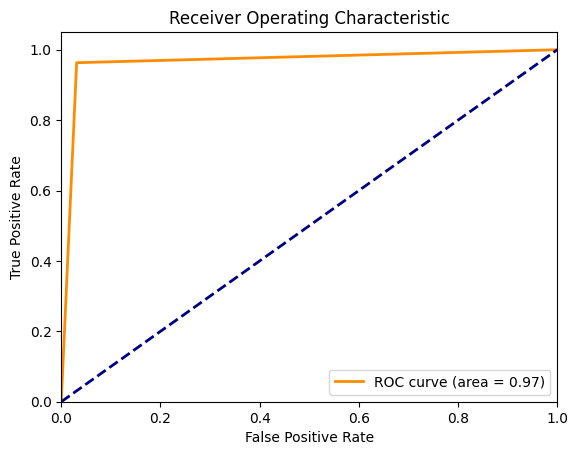

In [512]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, pred_ts)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [513]:
X_new = new_data.drop('ingresos_totales', axis=1)
y_new = new_data['ingresos_totales'] > 15000

predict_production = rf.predict(X_new)

accuracy_score(y_new, predict_production, normalize=True)


0.6

In [514]:
new_df = pd.DataFrame({'predict_production':predict_production, 'y_new':y_new})
new_df

,predict_production,y_new
0,True,False
1,False,True
2,True,True
3,True,True
4,True,True
